In [4]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt

In [8]:
class DroneDeliveryEnv(gym.Env):
    def __init__(self, deterministic=True):
        super(DroneDeliveryEnv, self).__init__()

        # Environment configuration
        self.grid_size = 6
        self.deterministic = deterministic
        self.start_position = (0, 0)  # Starting point
        self.goal_position = (5, 5)  # Delivery point
        self.no_fly_zones = [(3, 3), (4, 2)]  # No-fly zones

        # Action space: [Up, Down, Left, Right, Pickup, Drop-off]
        self.action_space = spaces.Discrete(6)

        # Observation space: (x, y) drone's position
        self.observation_space = spaces.Tuple((
            spaces.Discrete(self.grid_size),
            spaces.Discrete(self.grid_size)
        ))

        self.drone_position = None
        self.has_package = False
        self.time_step = 0

        # Rewards
        self.rewards = {
            "step": -1,
            "no_fly_zone": -20,
            "delivery": 20
        }

    def reset(self):
        self.drone_position = self.start_position
        self.has_package = False
        self.time_step = 0
        return self.drone_position

    def step(self, action):
        x, y = self.drone_position

        # Movement actions
        if action == 0:  # For Up Movement
            new_x, new_y = x - 1, y
        elif action == 1:  # For Down Movement
            new_x, new_y = x + 1, y
        elif action == 2:  # For Left Movement
            new_x, new_y = x, y - 1
        elif action == 3:  # For Right Movement
            new_x, new_y = x, y + 1
        elif action == 4:  # For Pickup Action
            if (x, y) == self.start_position:
                self.has_package = True
            new_x, new_y = x, y
        elif action == 5:  # For Drop-off Action
            if (x, y) == self.goal_position and self.has_package:
                reward = self.rewards["delivery"]
                return (new_x, new_y), reward, True, {}  # For Successful delivery
            new_x, new_y = x, y

        # Checking bounds
        if new_x < 0 or new_x >= self.grid_size or new_y < 0 or new_y >= self.grid_size:
            new_x, new_y = x, y

        # Stochastic movement
        if not self.deterministic:
            if np.random.uniform(0, 1) > 0.9:
                new_x, new_y = self._apply_random_drift(new_x, new_y)

        # Checking for no-fly zone
        if (new_x, new_y) in self.no_fly_zones:
            reward = self.rewards["no_fly_zone"]
        else:
            reward = self.rewards["step"]

        self.drone_position = (new_x, new_y)
        done = False
        self.time_step += 1

        return self.drone_position, reward, done, {}

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size))

        for x, y in self.no_fly_zones:
            grid[x, y] = 3  # No-fly zone

        start_x, start_y = self.start_position
        goal_x, goal_y = self.goal_position
        drone_x, drone_y = self.drone_position

        grid[start_x, start_y] = 1  # Start point
        grid[goal_x, goal_y] = 2  # Goal point
        grid[drone_x, drone_y] = 4  # Drone's position

        fig, ax = plt.subplots(figsize=(6, 6))
        cmap = plt.get_cmap("viridis", 5)
        im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=4)

        cbar = ax.figure.colorbar(im, ax=ax, ticks=[0, 1, 2, 3, 4])
        cbar.ax.set_yticklabels(['Fly Area', 'Start', 'Goal', 'No-fly Zone', 'Drone'])

        ax.set_xticks(np.arange(-0.5, self.grid_size, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, self.grid_size, 1), minor=True)
        ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
        ax.tick_params(which="minor", bottom=False, left=False)

        # Labeling start and goal positions
        for (i, j), label in np.ndenumerate(grid):
            if label == 1:
                ax.text(j, i, 'S', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
            elif label == 2:
                ax.text(j, i, 'G', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
            elif label == 4:
                ax.text(j, i, 'D', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

        plt.title(f"Autonomous Drone Delivery (Timestep: {self.time_step})")
        plt.show()


    def _apply_random_drift(self, x, y):
        possible_moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        drift_x, drift_y = possible_moves[np.random.randint(0, 4)]
        new_x, new_y = x + drift_x, y + drift_y

        # Bounds check
        if 0 <= new_x < self.grid_size and 0 <= new_y < self.grid_size:
            return new_x, new_y
        return x, y


Deterministic Environment:
State: (0, 0), Reward: -1


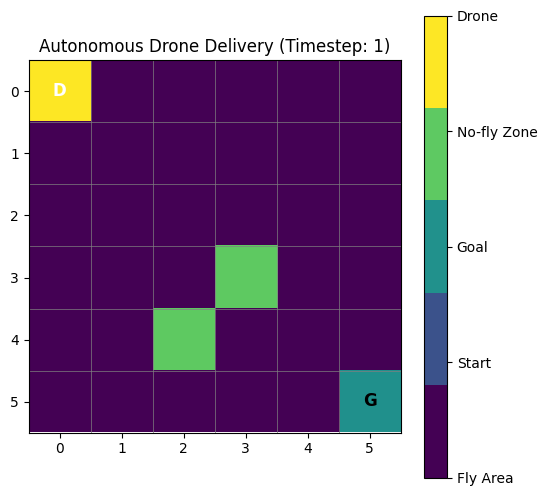

State: (1, 0), Reward: -1


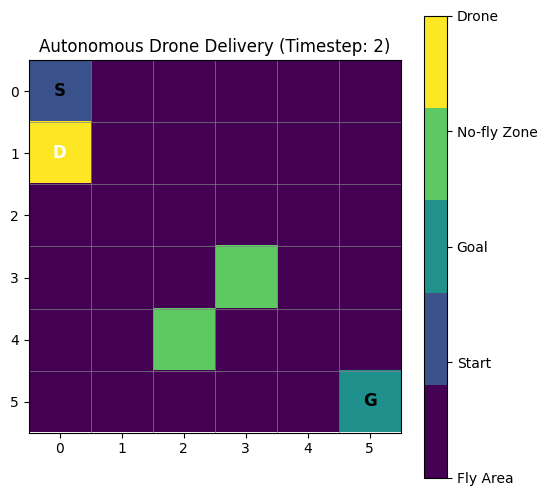

State: (0, 0), Reward: -1


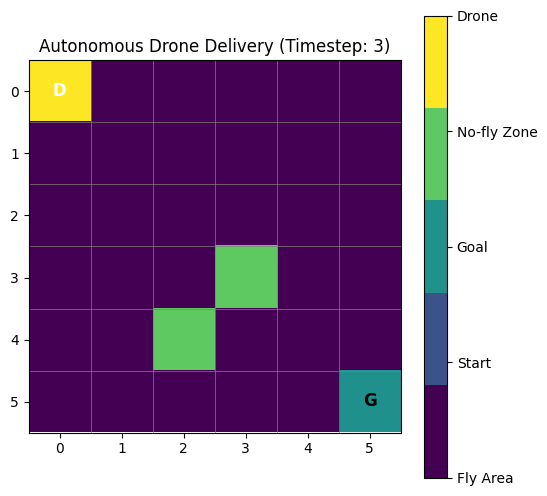

State: (1, 0), Reward: -1


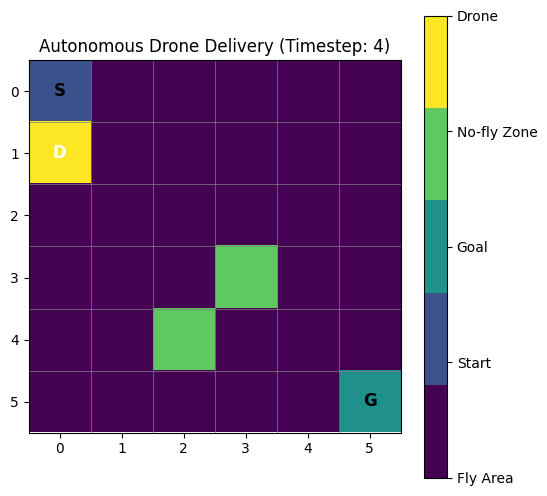

State: (1, 0), Reward: -1


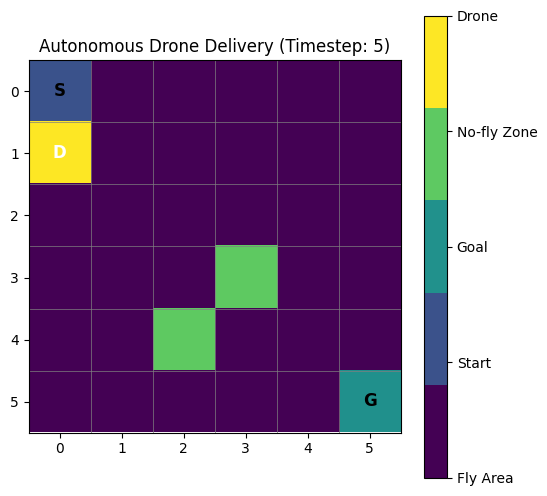

State: (1, 1), Reward: -1


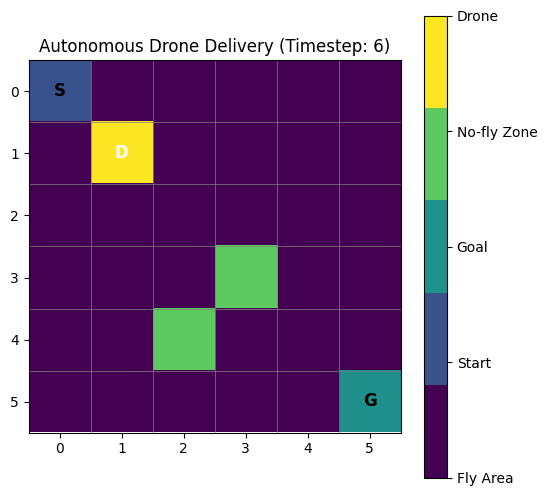

State: (1, 1), Reward: -1


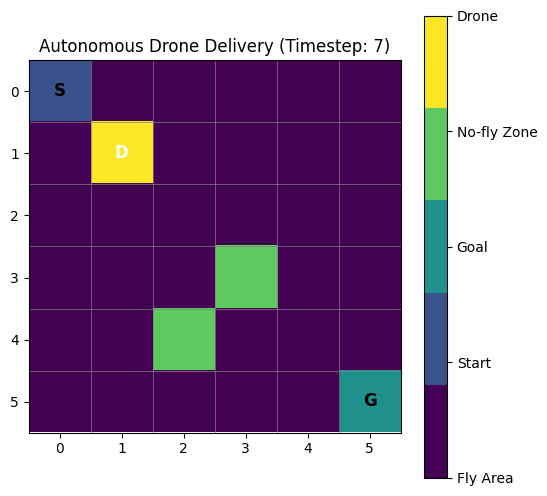

State: (1, 0), Reward: -1


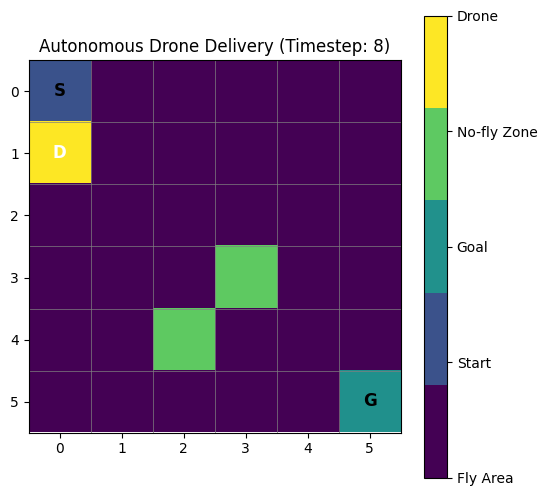

State: (1, 0), Reward: -1


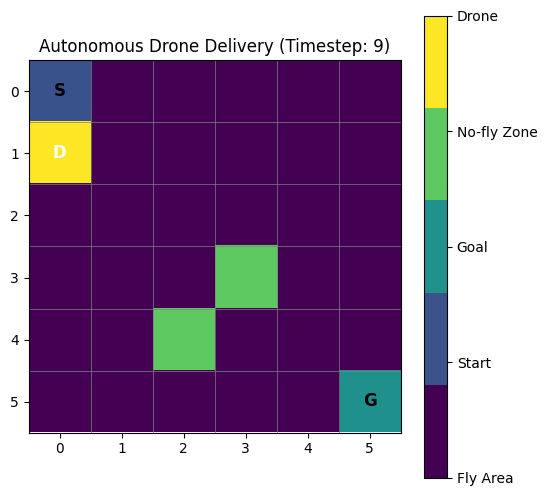

State: (1, 0), Reward: -1


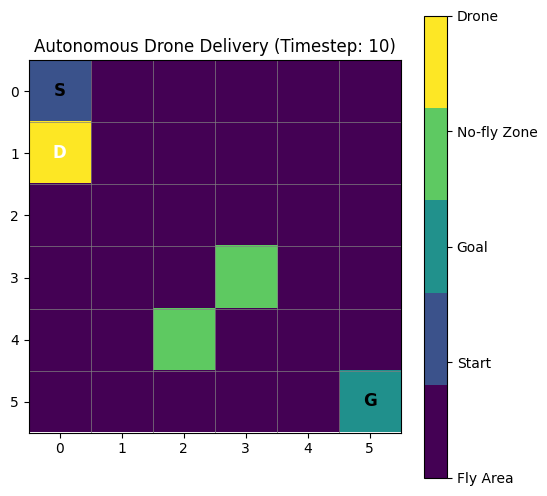

State: (1, 0), Reward: -1


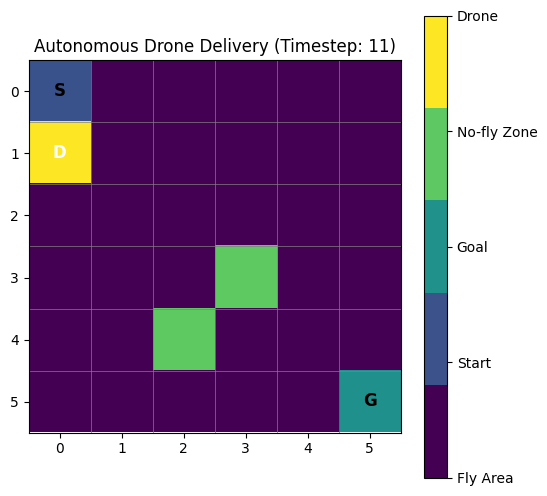

State: (1, 0), Reward: -1


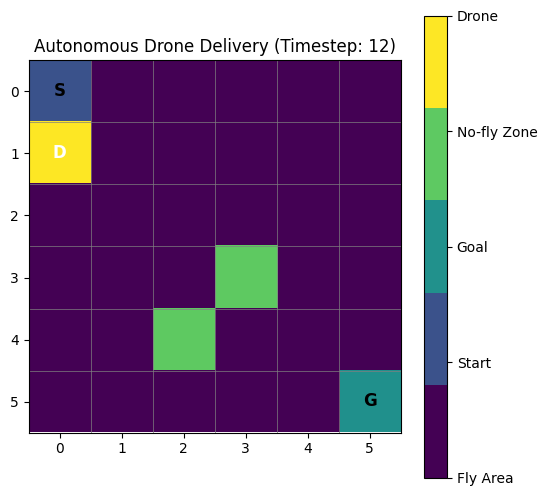

State: (1, 0), Reward: -1


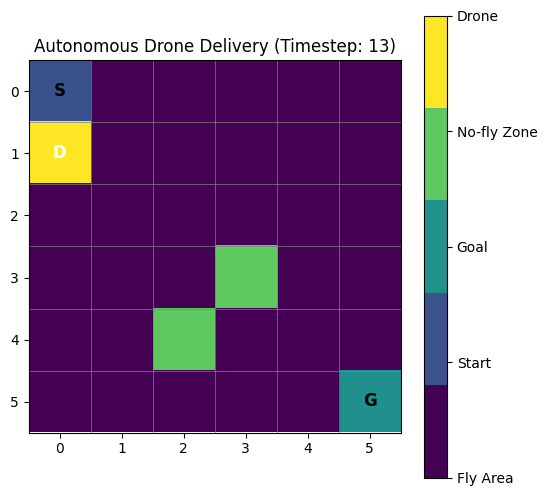

State: (1, 0), Reward: -1


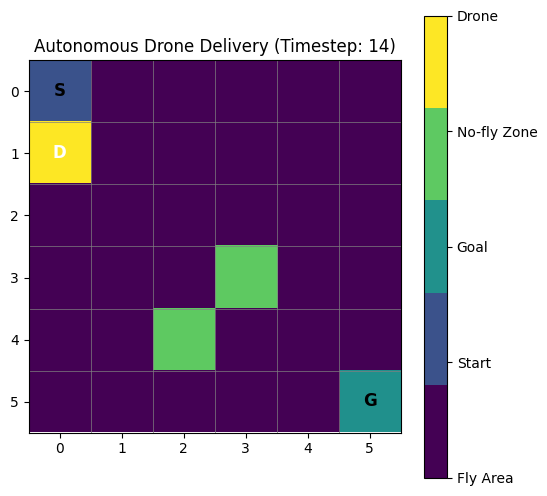

State: (2, 0), Reward: -1


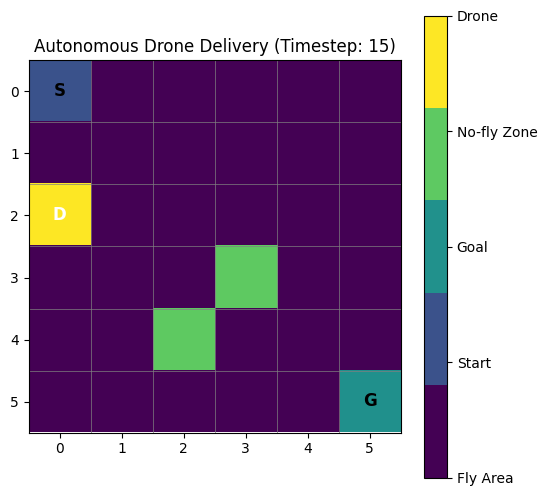

State: (2, 0), Reward: -1


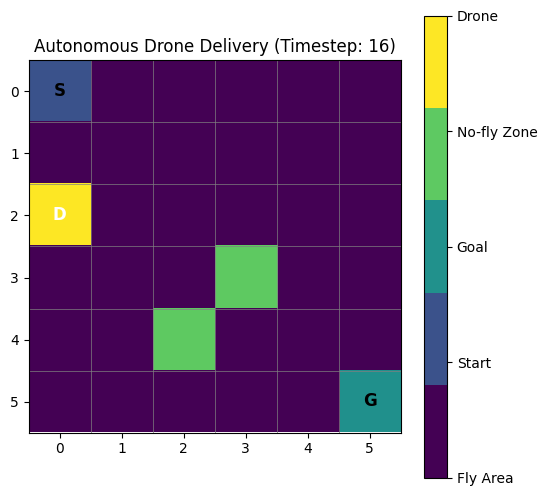

State: (3, 0), Reward: -1


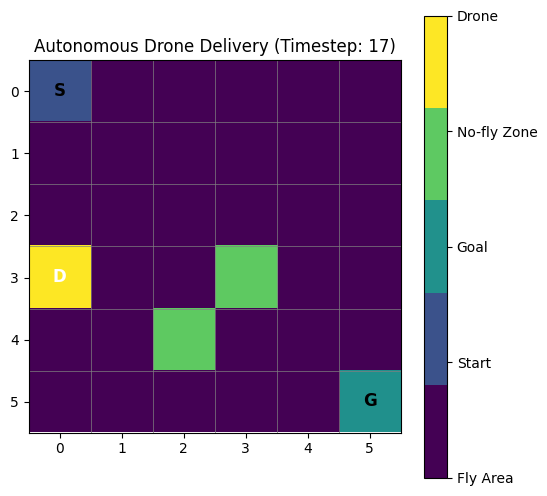

State: (2, 0), Reward: -1


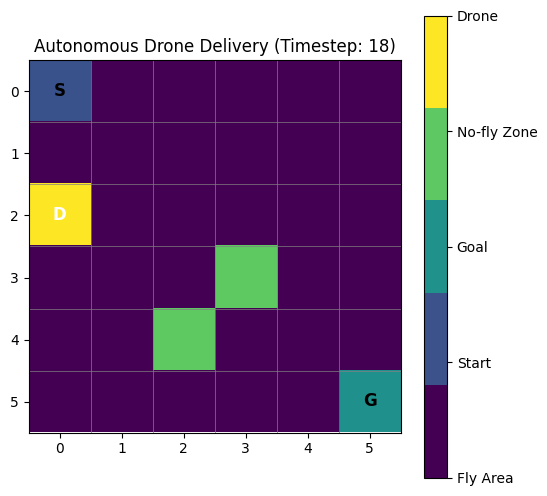

State: (2, 0), Reward: -1


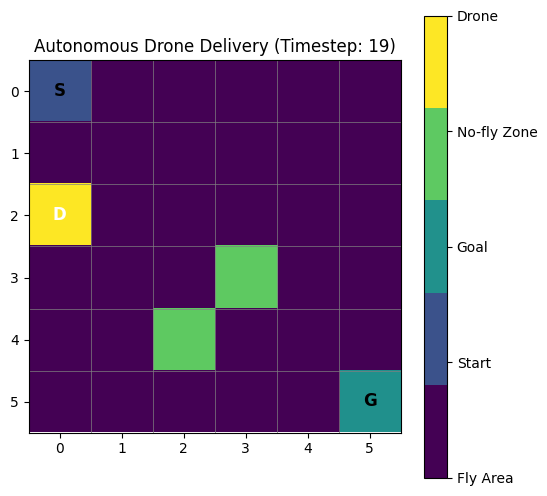

State: (1, 0), Reward: -1


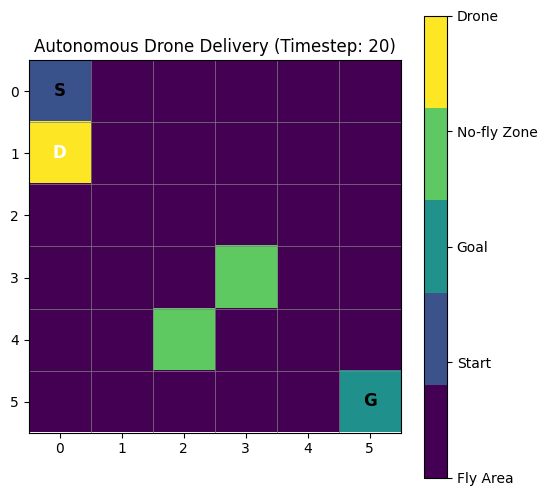

State: (1, 1), Reward: -1


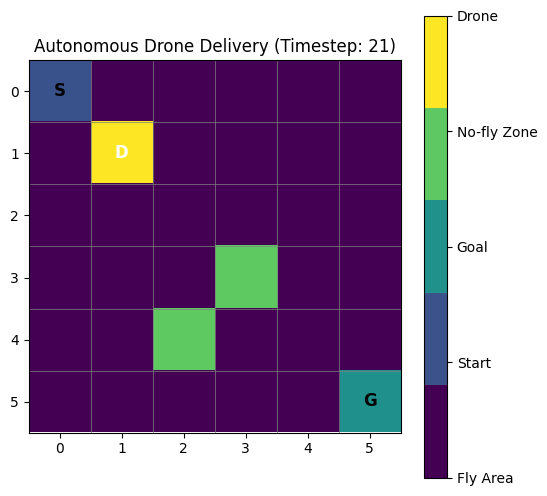

State: (1, 1), Reward: -1


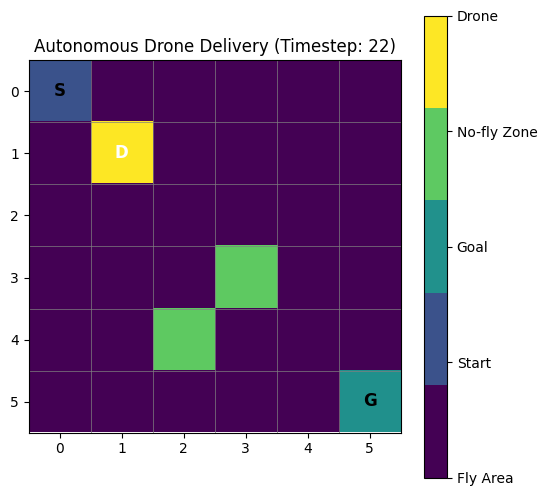

State: (1, 2), Reward: -1


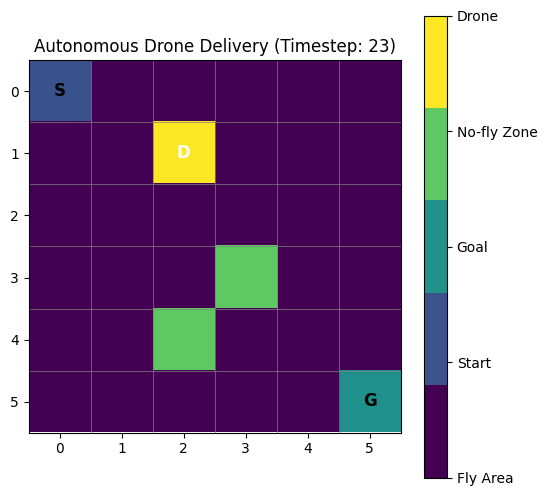

State: (1, 3), Reward: -1


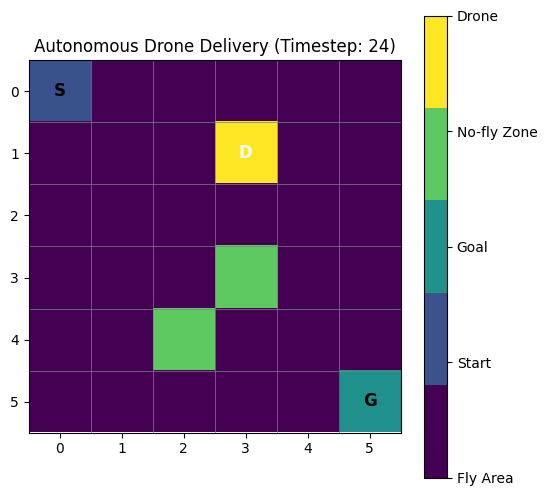

State: (1, 4), Reward: -1


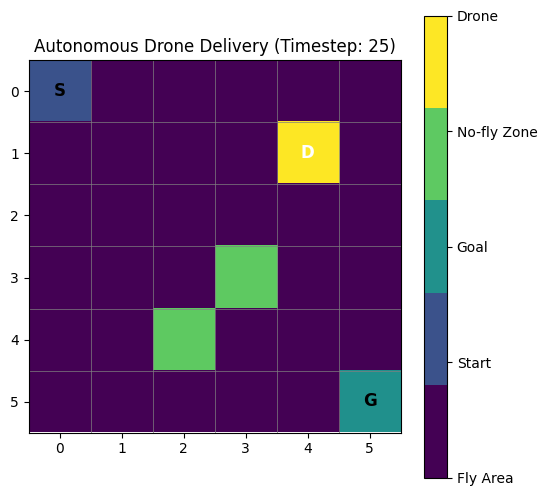

State: (2, 4), Reward: -1


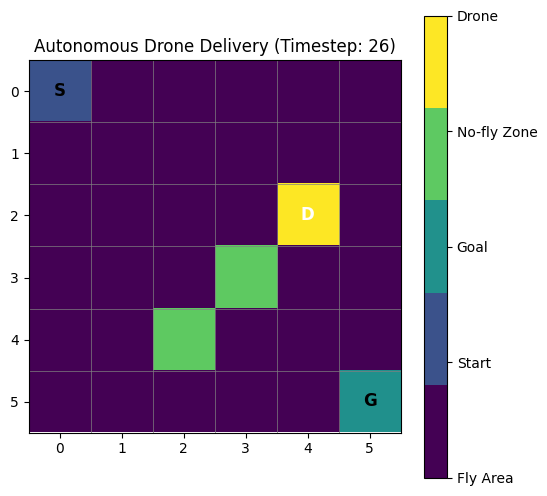

State: (3, 4), Reward: -1


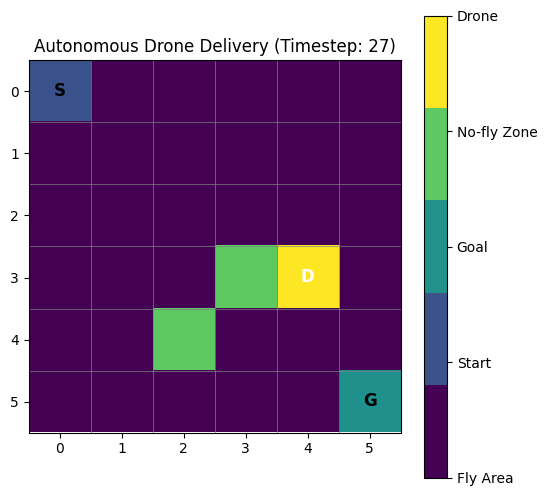

State: (3, 5), Reward: -1


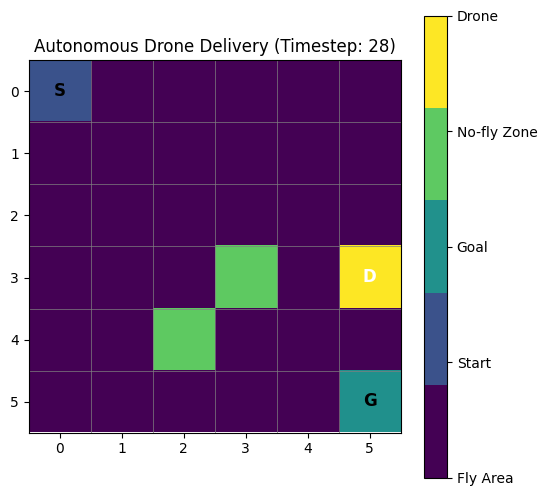

State: (3, 5), Reward: -1


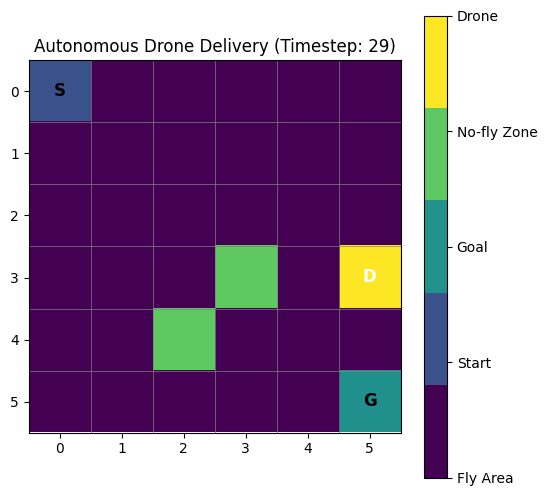

State: (3, 5), Reward: -1


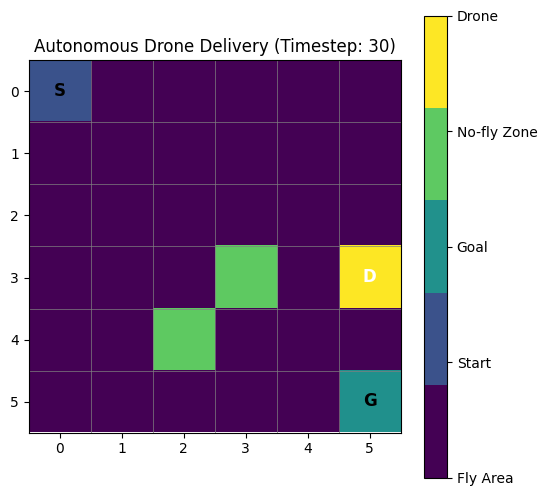


Stochastic Environment:
State: (0, 0), Reward: -1


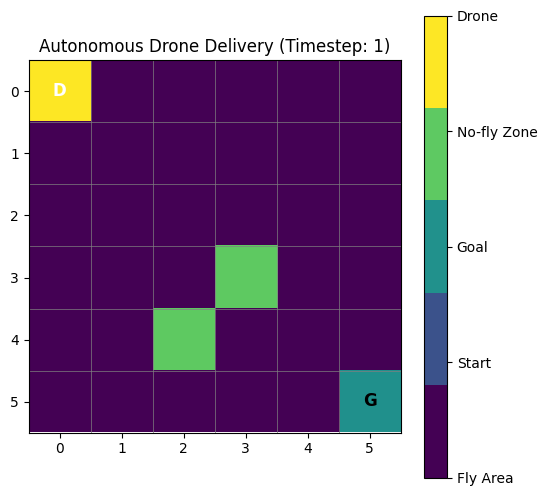

State: (1, 0), Reward: -1


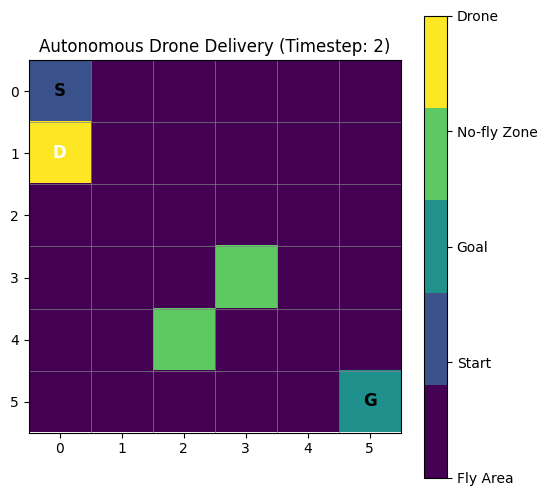

State: (2, 0), Reward: -1


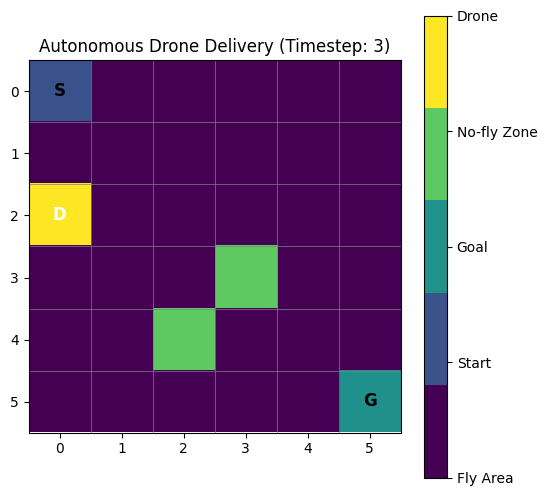

State: (2, 0), Reward: -1


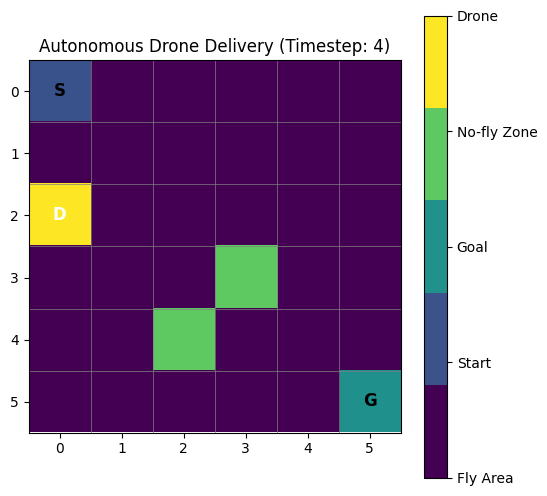

State: (2, 0), Reward: -1


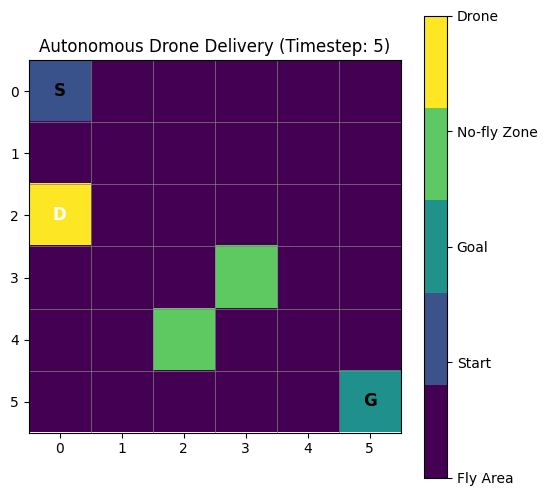

State: (2, 0), Reward: -1


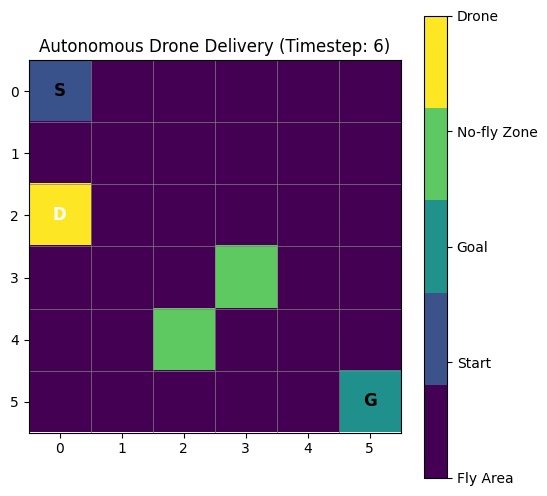

State: (1, 0), Reward: -1


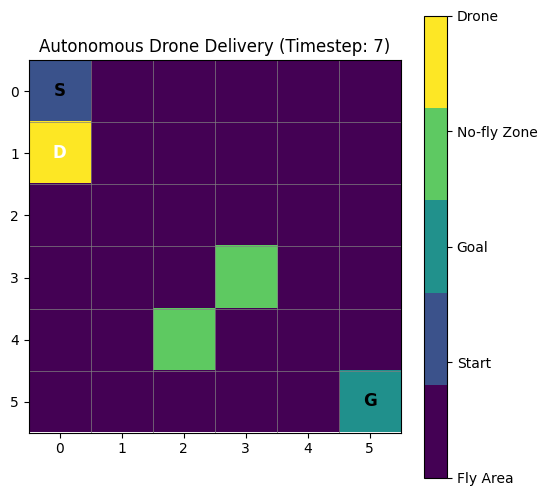

State: (0, 0), Reward: -1


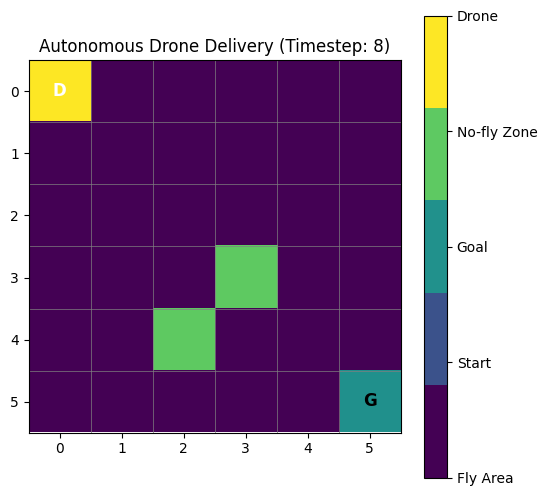

State: (0, 0), Reward: -1


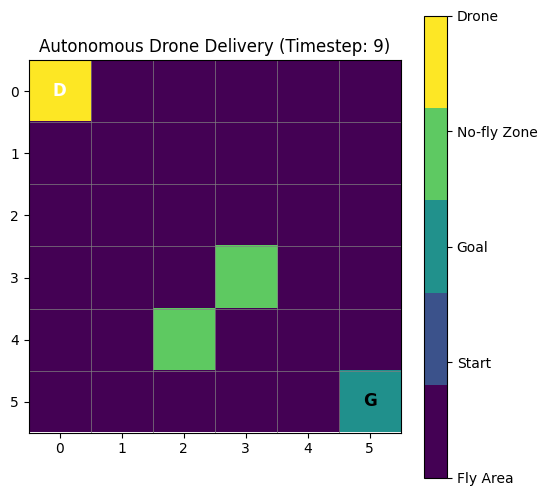

State: (0, 0), Reward: -1


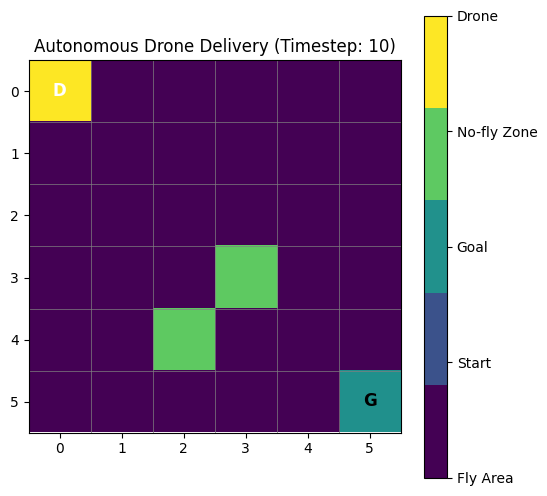

State: (0, 0), Reward: -1


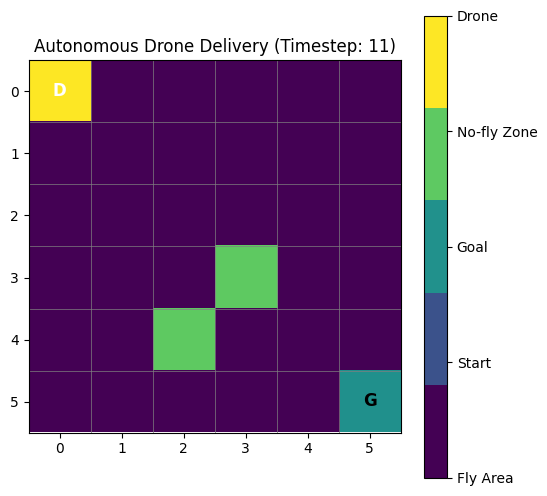

State: (0, 1), Reward: -1


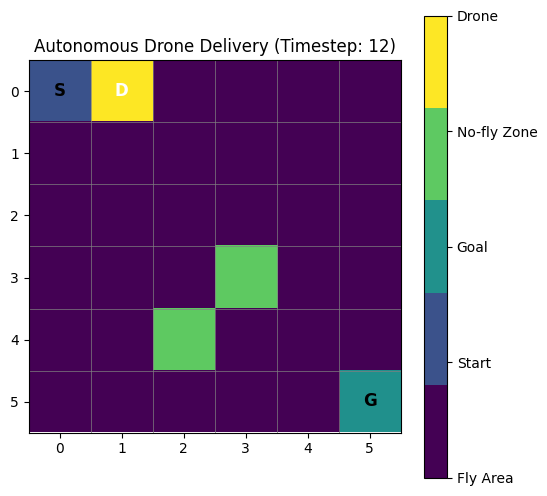

State: (0, 2), Reward: -1


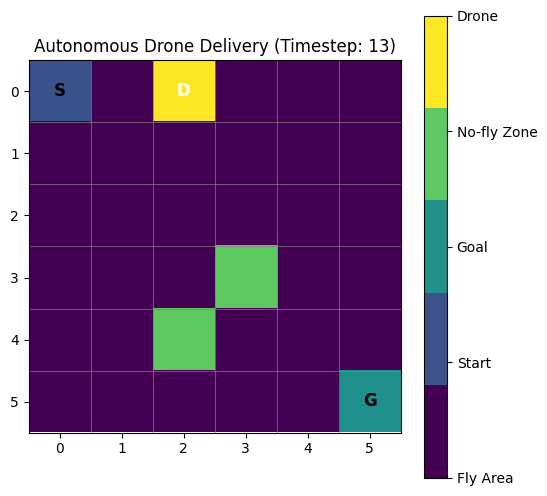

State: (0, 1), Reward: -1


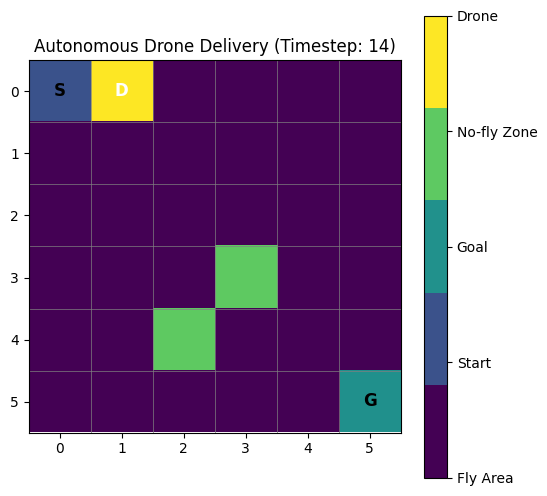

State: (1, 2), Reward: -1


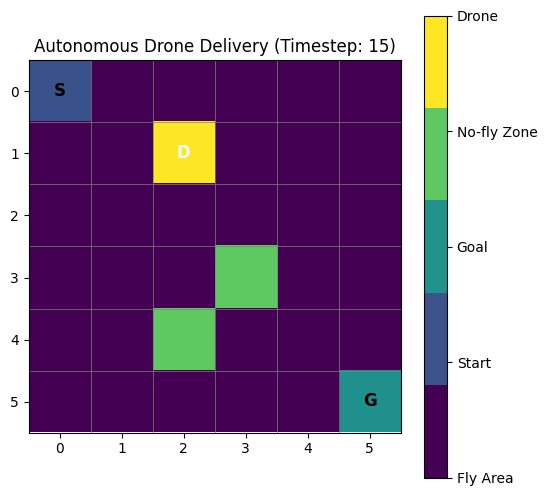

State: (0, 2), Reward: -1


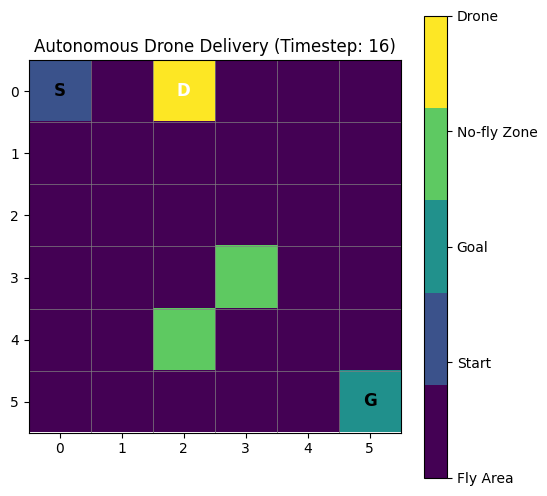

State: (0, 3), Reward: -1


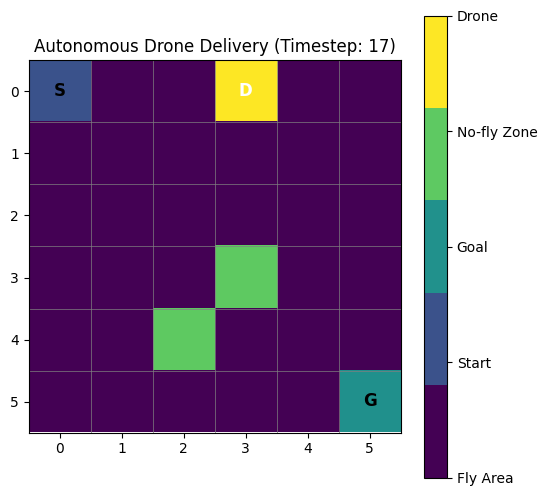

State: (0, 3), Reward: -1


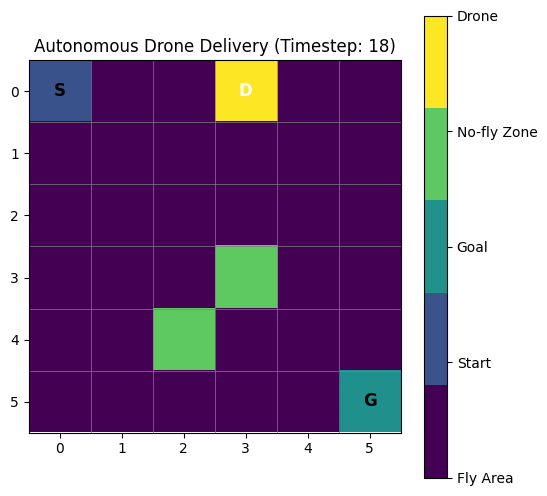

State: (0, 3), Reward: -1


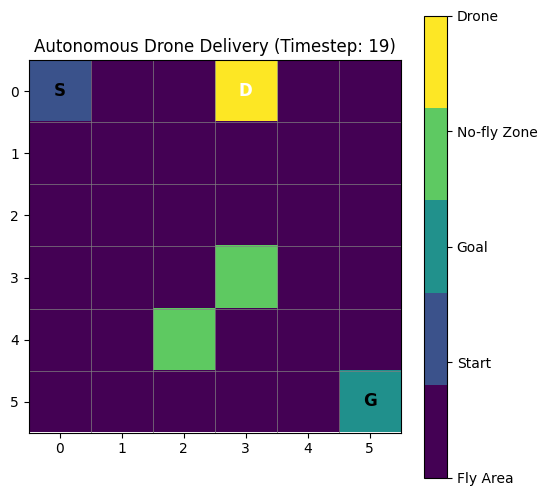

State: (1, 3), Reward: -1


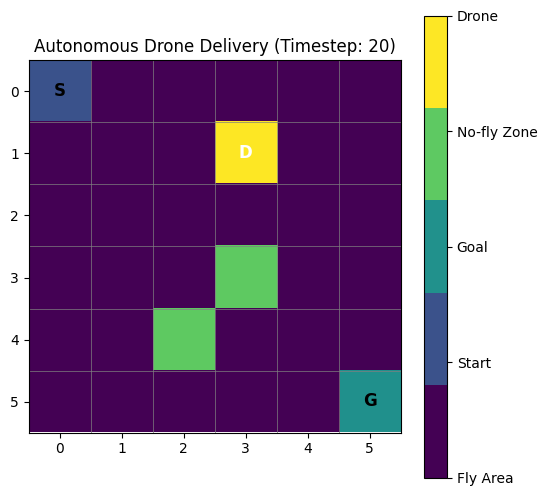

State: (2, 3), Reward: -1


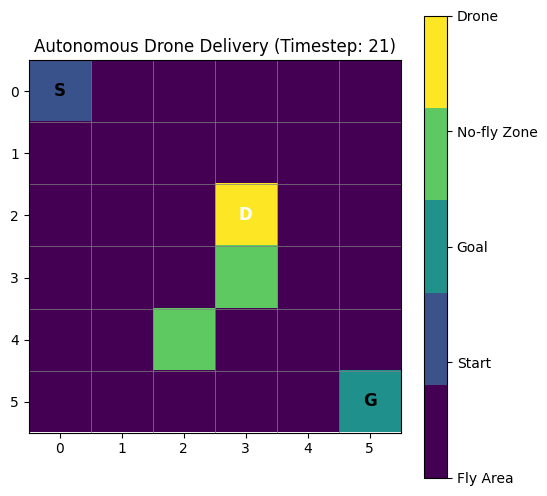

State: (3, 3), Reward: -20


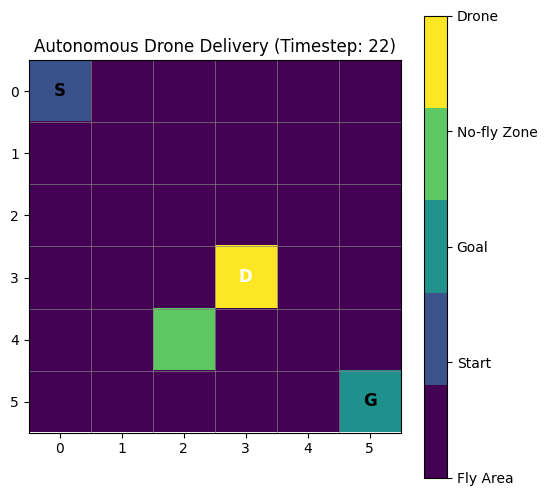

State: (3, 3), Reward: -20


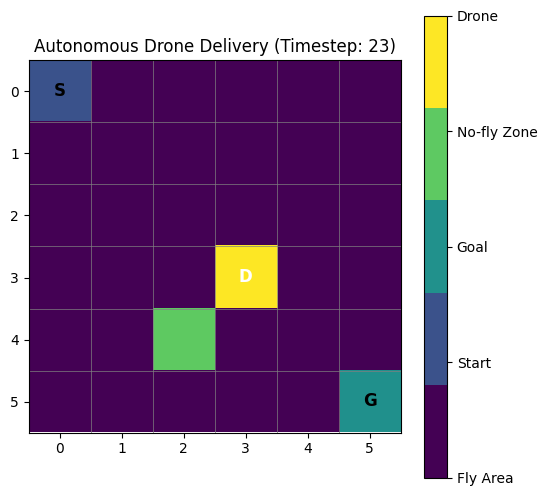

State: (3, 2), Reward: -1


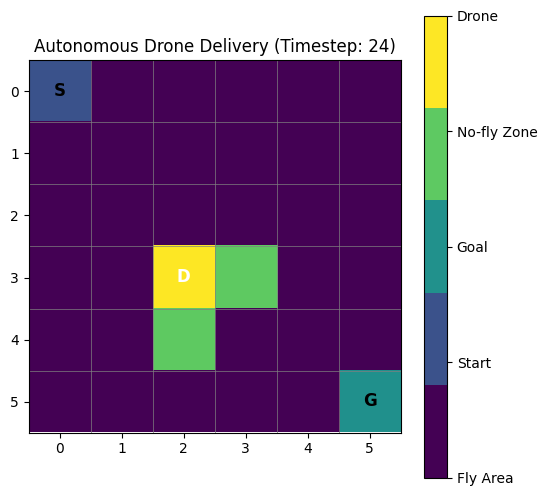

State: (3, 4), Reward: -1


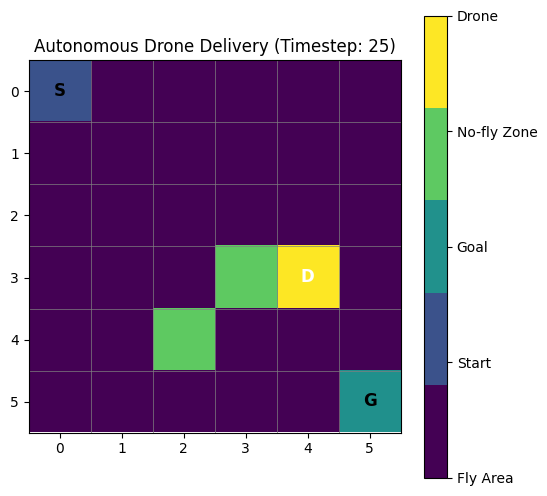

State: (3, 5), Reward: -1


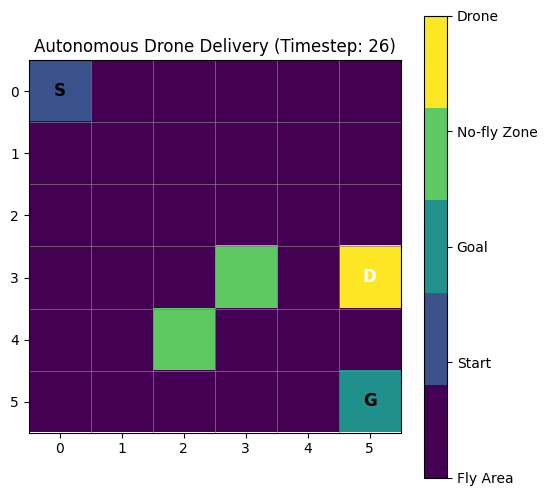

State: (3, 5), Reward: -1


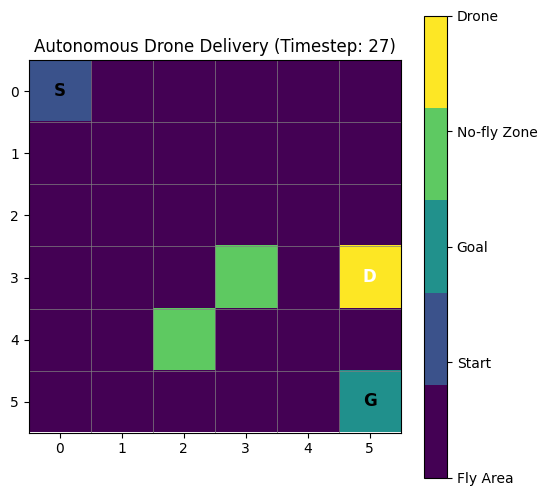

State: (2, 5), Reward: -1


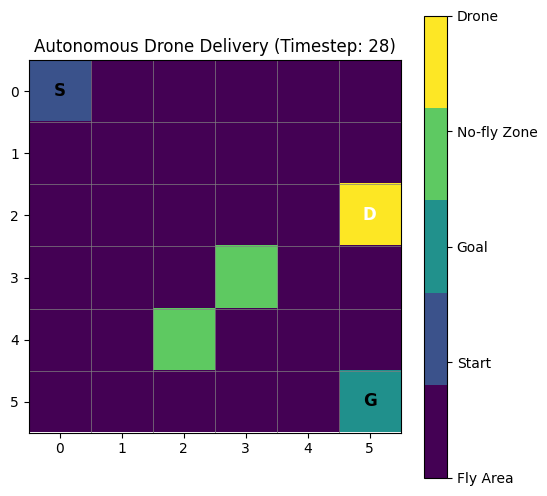

State: (2, 5), Reward: -1


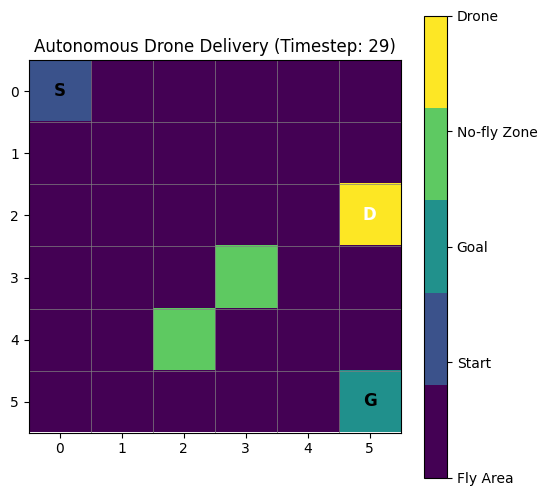

State: (1, 5), Reward: -1


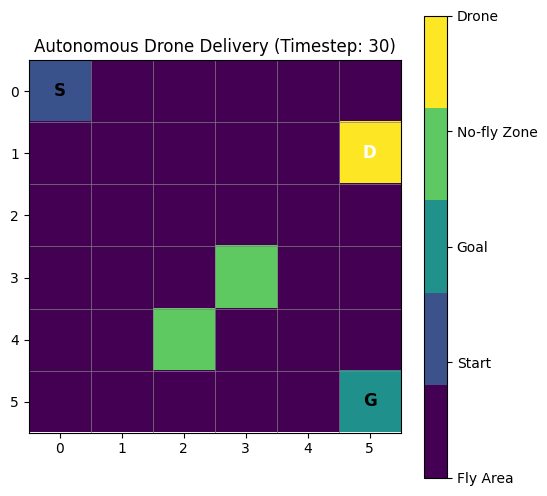

In [ ]:
if __name__ == "__main__":
    # Deterministic Scenario
    env = DroneDeliveryEnv(deterministic=True)
    state = env.reset()
    print("Deterministic Environment:")
    for _ in range(30):
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        print(f"State: {state}, Reward: {reward}")
        env.render()

    # Stochastic Scenario
    env_stochastic = DroneDeliveryEnv(deterministic=False)
    state = env_stochastic.reset()
    print("\nStochastic Environment:")
    for _ in range(30):
        action = env_stochastic.action_space.sample()
        state, reward, done, _ = env_stochastic.step(action)
        print(f"State: {state}, Reward: {reward}")
        env_stochastic.render()


### Bonus Task

In [5]:
class MultiDeliveryDroneEnv(gym.Env):
    def __init__(self, max_deliveries=3, deterministic=True):
        super(MultiDeliveryDroneEnv, self).__init__()

        self.grid_size = 6
        self.deterministic = deterministic
        self.start_position = (0, 0)  # Warehouse location
        self.goal_position = (5, 5)  # First delivery location
        self.no_fly_zones = [(3, 3), (4, 2)]  # Static obstacles

        # Action space: [Up, Down, Left, Right, Pickup, Drop-off]
        self.action_space = spaces.Discrete(6)

        # Observation space: drone position and delivery count
        self.observation_space = spaces.Tuple((
            spaces.Discrete(self.grid_size),
            spaces.Discrete(self.grid_size),
            spaces.Discrete(max_deliveries + 1)
        ))

        self.drone_position = None
        self.has_package = False
        self.time_step = 0
        self.max_deliveries = max_deliveries
        self.delivery_count = 0

        # Rewards
        self.rewards = {
            "step": -1,
            "no_fly_zone": -20,
            "delivery": 20
        }

    def reset(self):
        self.drone_position = self.start_position
        self.has_package = False
        self.time_step = 0
        self.delivery_count = 0
        self.goal_position = self._generate_new_goal()
        return (self.drone_position[0], self.drone_position[1], self.delivery_count)

    def step(self, action):
        x, y = self.drone_position

        if action == 0:  
            new_x, new_y = x - 1, y
        elif action == 1:
            new_x, new_y = x + 1, y
        elif action == 2:
            new_x, new_y = x, y - 1
        elif action == 3:
            new_x, new_y = x, y + 1
        elif action == 4:
            if (x, y) == self.start_position:
                self.has_package = True
            new_x, new_y = x, y
        elif action == 5:
            if (x, y) == self.goal_position and self.has_package:
                reward = self.rewards["delivery"]
                self.delivery_count += 1
                self.has_package = False

                if self.delivery_count >= self.max_deliveries:
                    return (new_x, new_y, self.delivery_count), reward, True, {}

                self.drone_position = self.start_position
                self.goal_position = self._generate_new_goal()
                return (self.drone_position[0], self.drone_position[1], self.delivery_count), reward, False, {}

            new_x, new_y = x, y

        if new_x < 0 or new_x >= self.grid_size or new_y < 0 or new_y >= self.grid_size:
            new_x, new_y = x, y

        # Stochastic scenario
        if not self.deterministic:
            if np.random.uniform(0, 1) > 0.9:
                new_x, new_y = self._apply_random_drift(new_x, new_y)


        # Check for no-fly zones
        if (new_x, new_y) in self.no_fly_zones:
            reward = self.rewards["no_fly_zone"]
        else:
            reward = self.rewards["step"]

        self.drone_position = (new_x, new_y)
        self.time_step += 1
        done = False

        return (new_x, new_y, self.delivery_count), reward, done, {}

    def _generate_new_goal(self):
        while True:
            goal_x = np.random.randint(0, self.grid_size)
            goal_y = np.random.randint(0, self.grid_size)
            if (goal_x, goal_y) != self.start_position and (goal_x, goal_y) not in self.no_fly_zones:
                return (goal_x, goal_y)

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size))

        for x, y in self.no_fly_zones:
            grid[x, y] = 3

        start_x, start_y = self.start_position
        goal_x, goal_y = self.goal_position
        drone_x, drone_y = self.drone_position

        grid[start_x, start_y] = 1
        grid[goal_x, goal_y] = 2
        grid[drone_x, drone_y] = 4

        fig, ax = plt.subplots(figsize=(6, 6))
        cmap = plt.get_cmap("viridis", 5)
        im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=4)

        cbar = ax.figure.colorbar(im, ax=ax, ticks=[0, 1, 2, 3, 4])
        cbar.ax.set_yticklabels(['Empty', 'Start', 'Goal', 'No-fly Zone', 'Drone'])

        for (i, j), label in np.ndenumerate(grid):
            if label == 1:
                ax.text(j, i, 'S', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
            elif label == 2:
                ax.text(j, i, 'G', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
            elif label == 4:
                ax.text(j, i, 'D', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

        plt.title(f"Deliveries Completed: {self.delivery_count}/{self.max_deliveries}, Time-step: {self.time_step}")
        plt.show()

    def _apply_random_drift(self, x, y):
        possible_moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        drift_x, drift_y = possible_moves[np.random.randint(0, 4)]
        new_x, new_y = x + drift_x, y + drift_y

        if 0 <= new_x < self.grid_size and 0 <= new_y < self.grid_size:
            return new_x, new_y
        return x, y


Multiple Deliveries Environment:
State: (0, 0, 0), Reward: -1


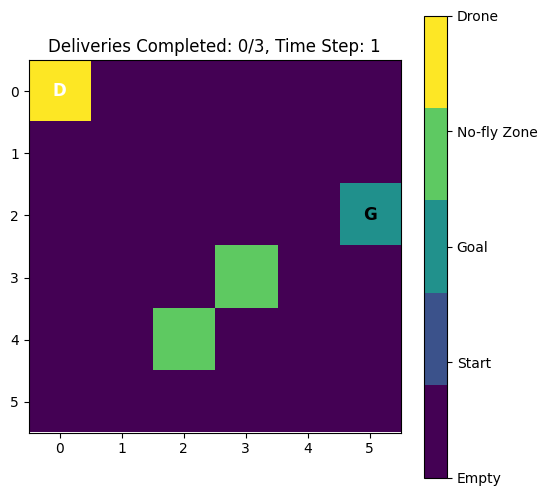

State: (1, 0, 0), Reward: -1


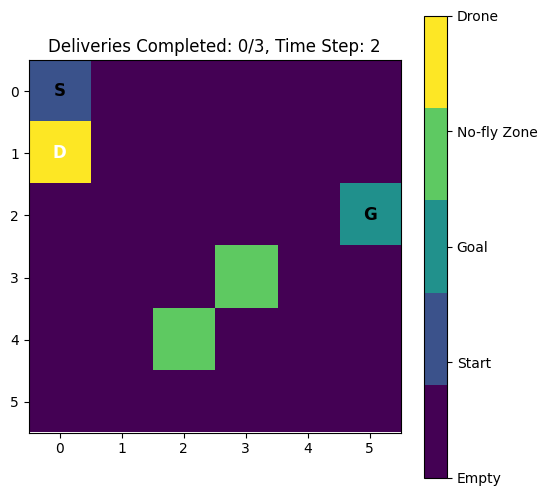

State: (1, 1, 0), Reward: -1


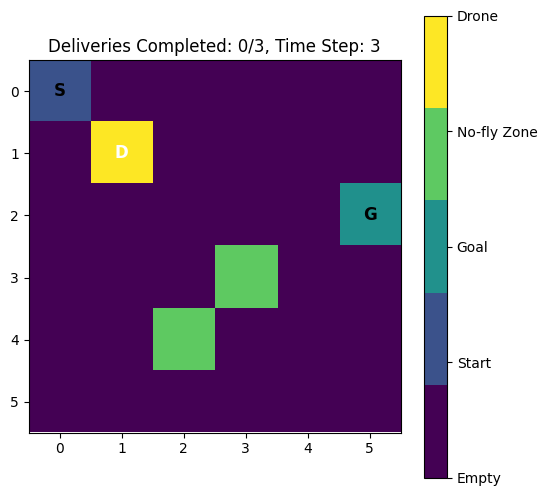

State: (1, 2, 0), Reward: -1


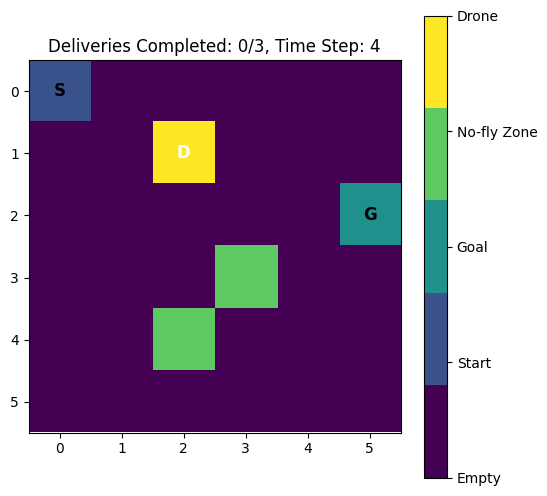

State: (1, 1, 0), Reward: -1


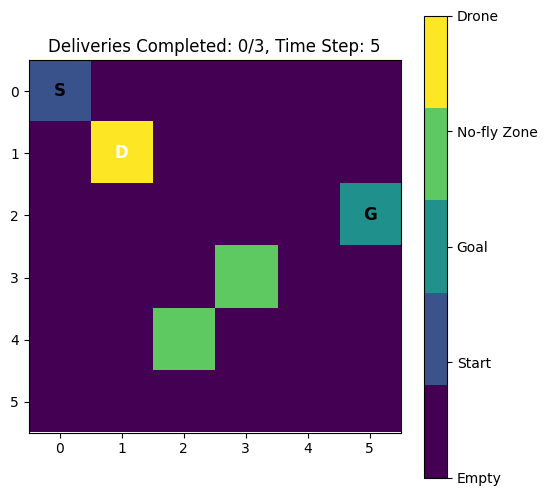

State: (1, 1, 0), Reward: -1


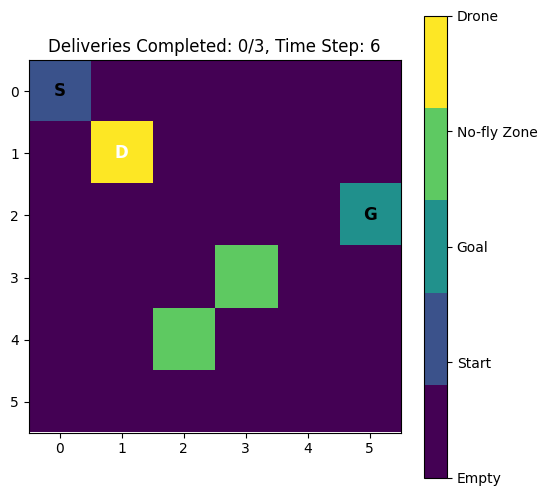

State: (1, 2, 0), Reward: -1


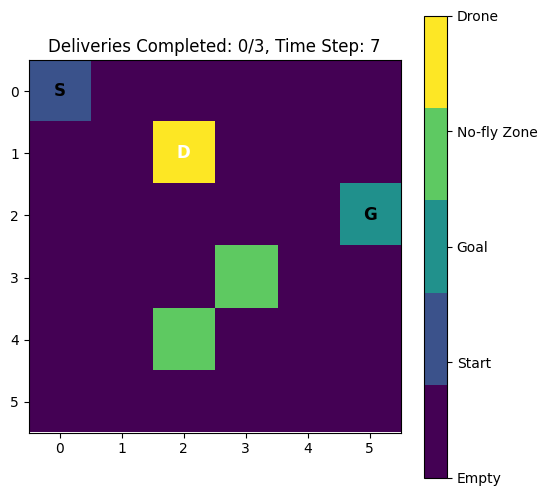

State: (1, 3, 0), Reward: -1


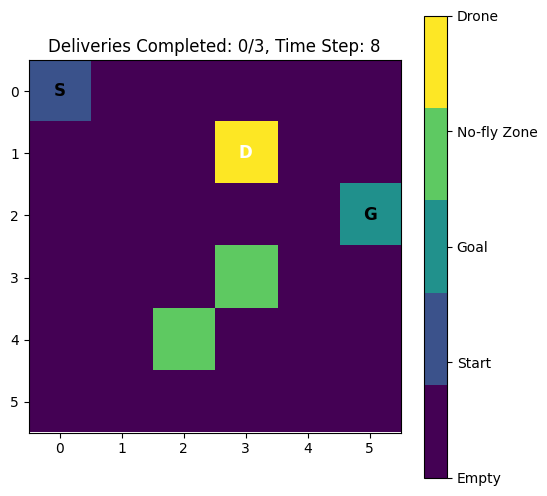

State: (2, 3, 0), Reward: -1


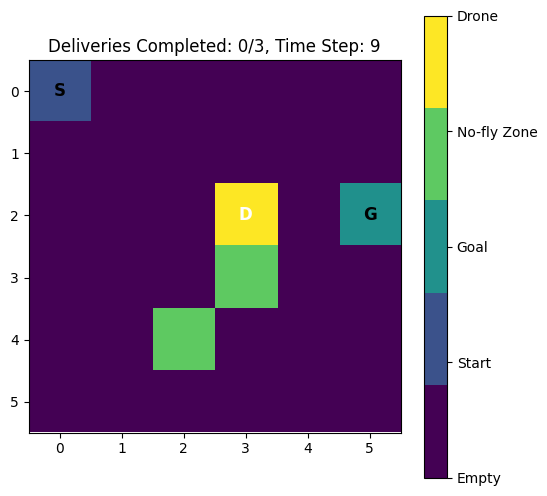

State: (2, 4, 0), Reward: -1


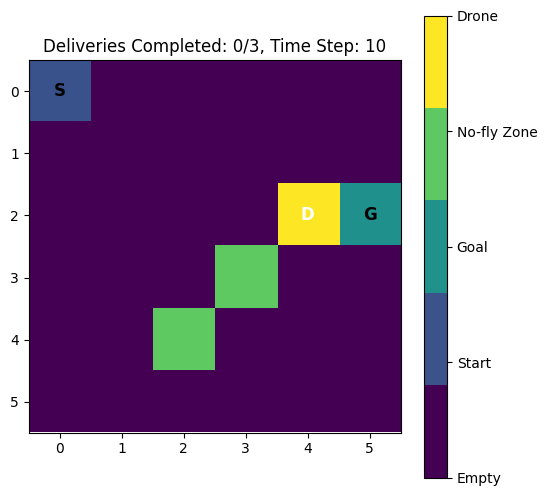

State: (1, 4, 0), Reward: -1


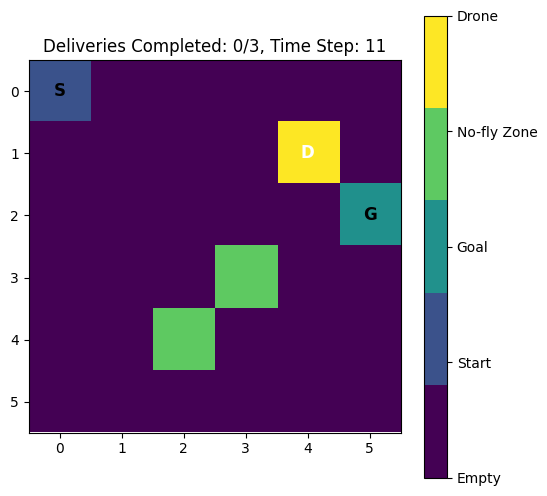

State: (1, 4, 0), Reward: -1


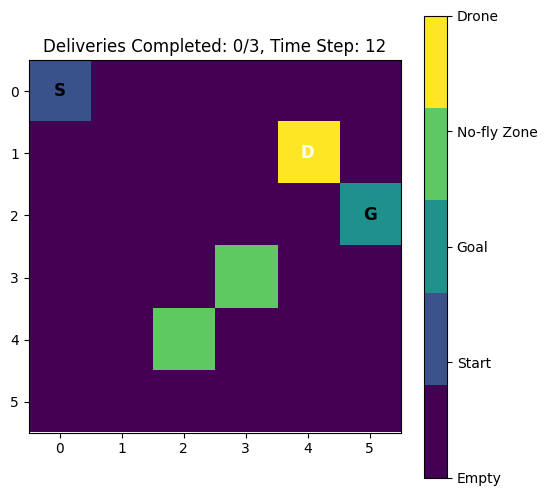

State: (1, 4, 0), Reward: -1


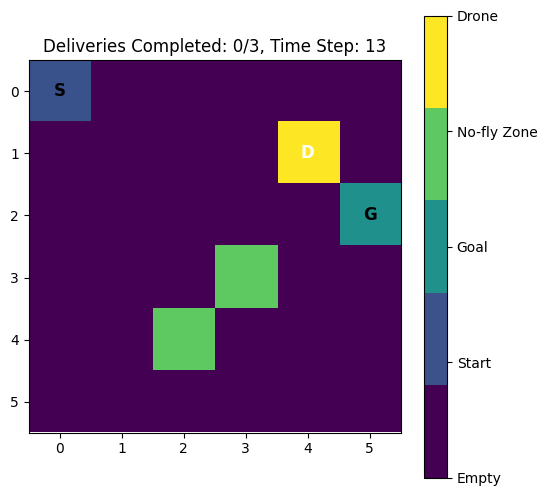

State: (1, 4, 0), Reward: -1


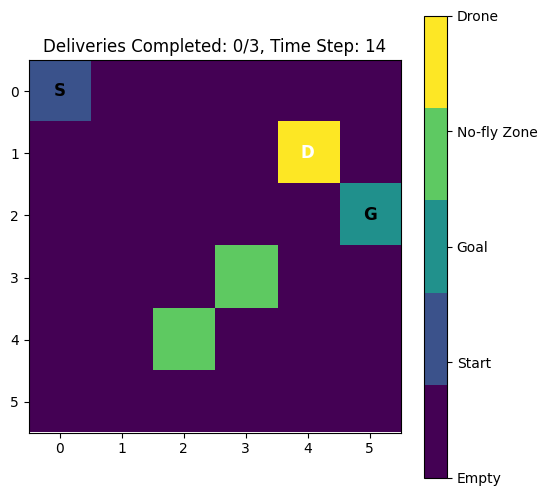

State: (2, 4, 0), Reward: -1


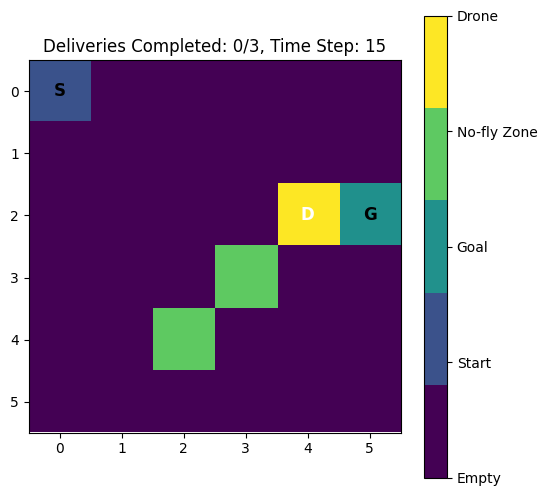

State: (2, 5, 0), Reward: -1


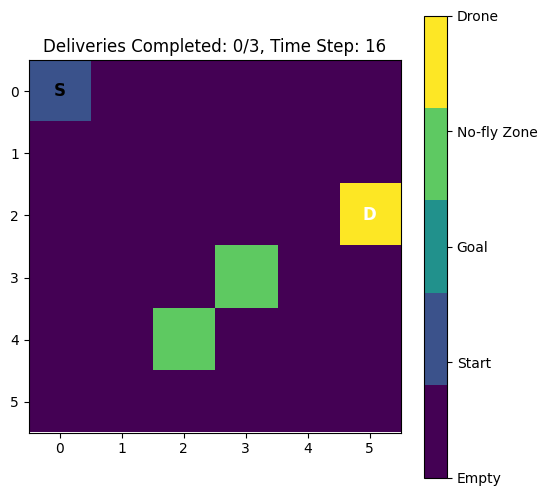

State: (3, 5, 0), Reward: -1


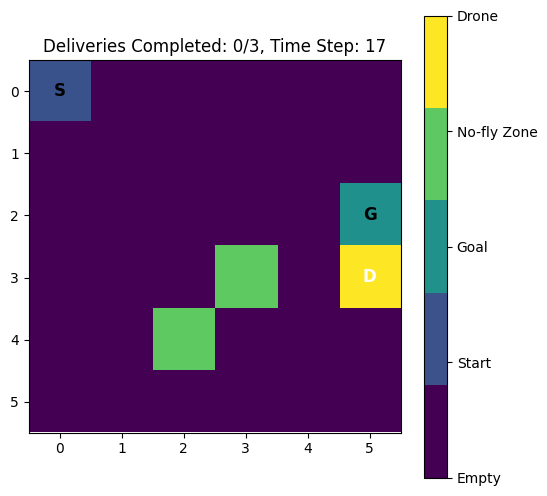

State: (3, 4, 0), Reward: -1


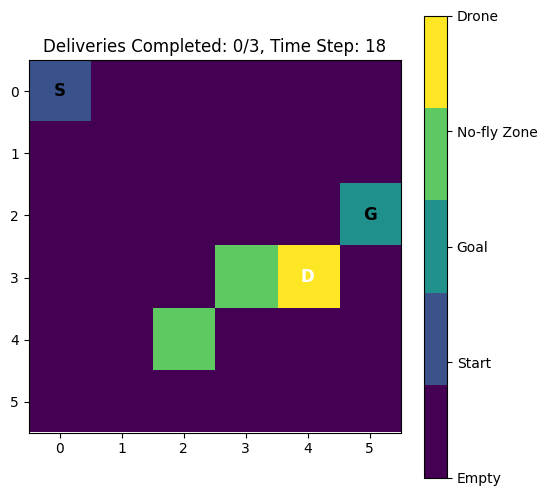

State: (4, 4, 0), Reward: -1


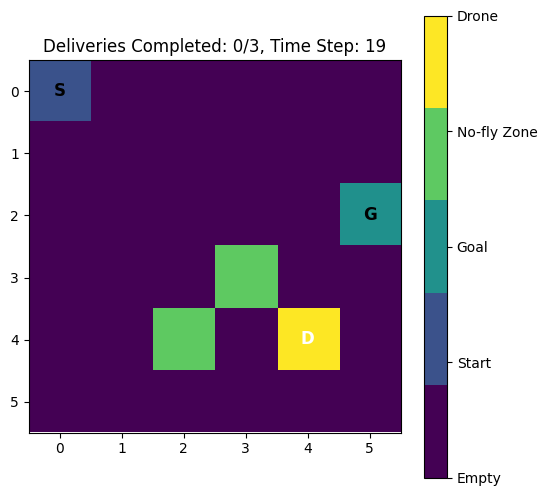

State: (5, 4, 0), Reward: -1


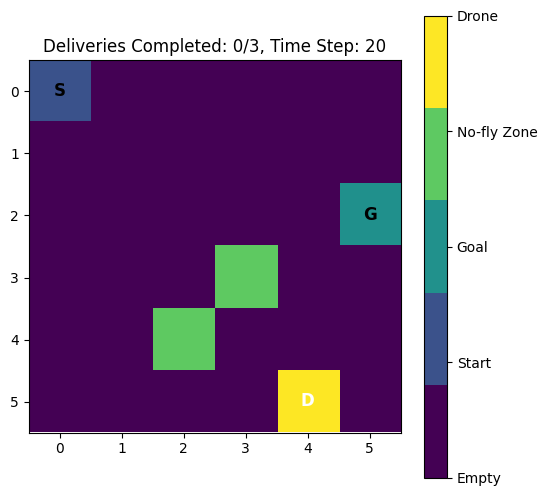

State: (5, 3, 0), Reward: -1


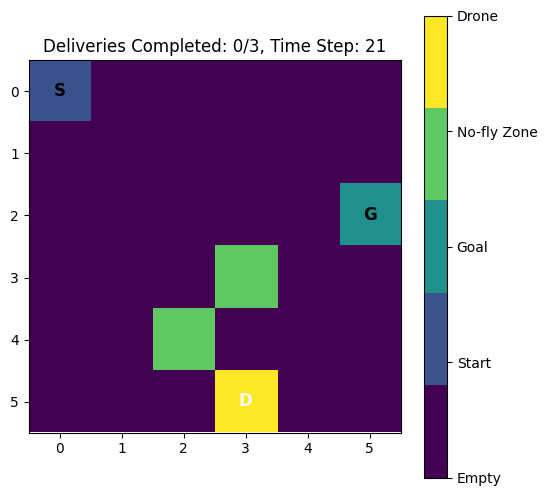

State: (5, 3, 0), Reward: -1


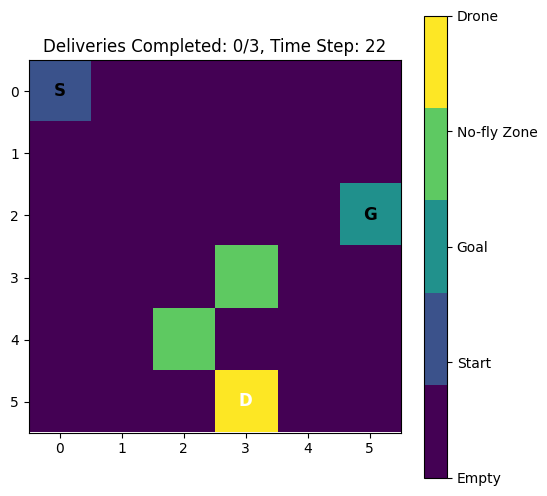

State: (5, 3, 0), Reward: -1


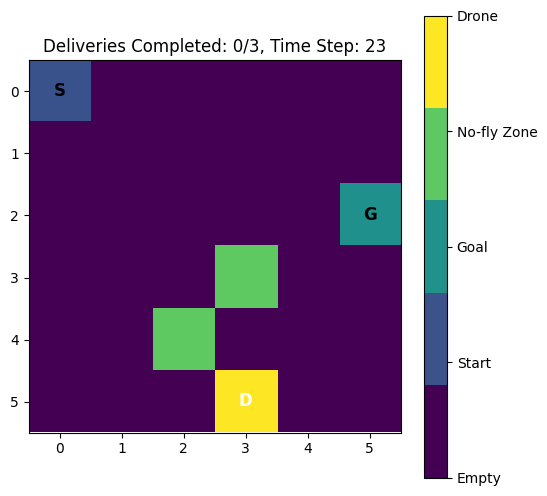

State: (4, 3, 0), Reward: -1


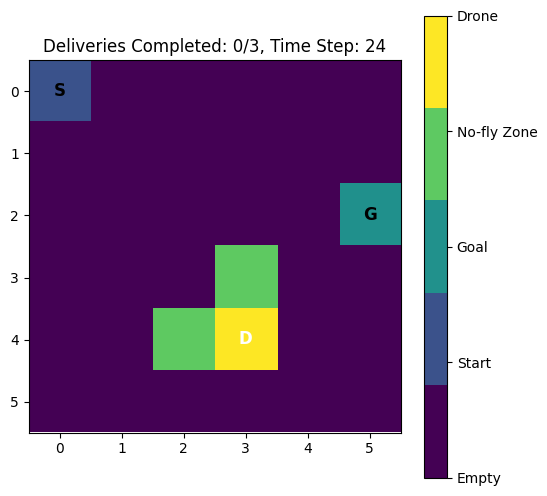

State: (5, 3, 0), Reward: -1


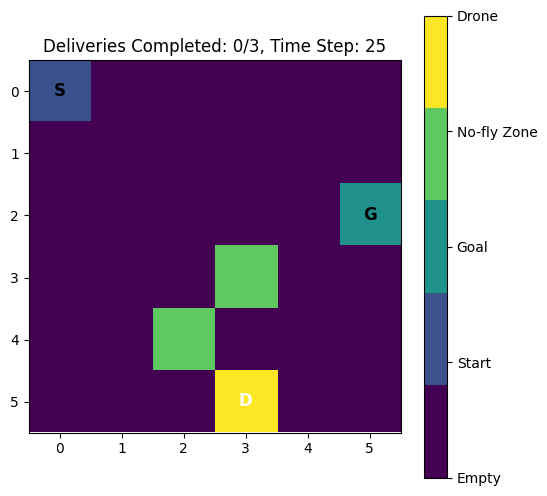

State: (5, 2, 0), Reward: -1


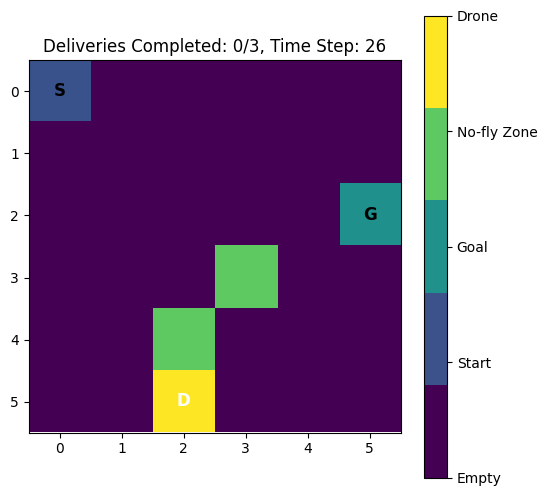

State: (5, 2, 0), Reward: -1


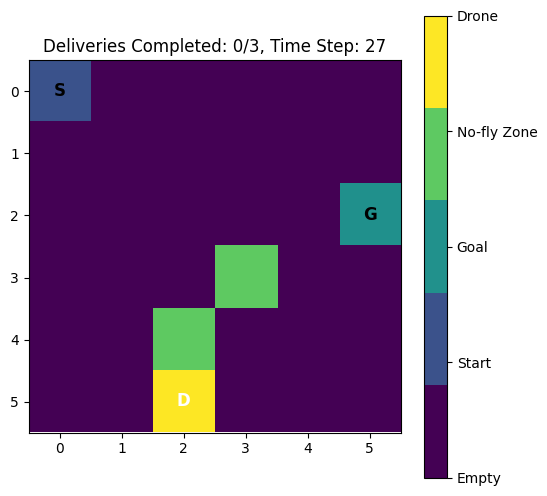

State: (5, 2, 0), Reward: -1


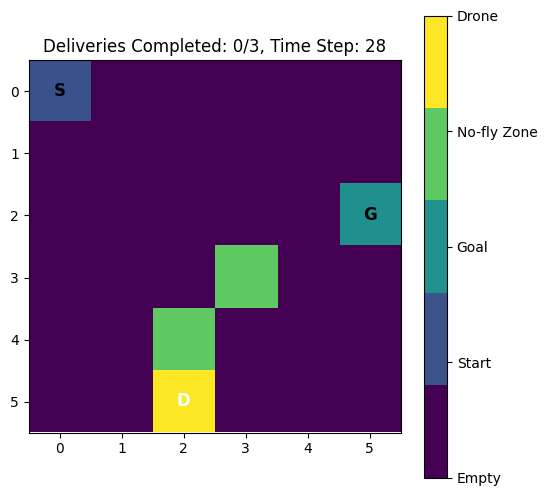

State: (5, 3, 0), Reward: -1


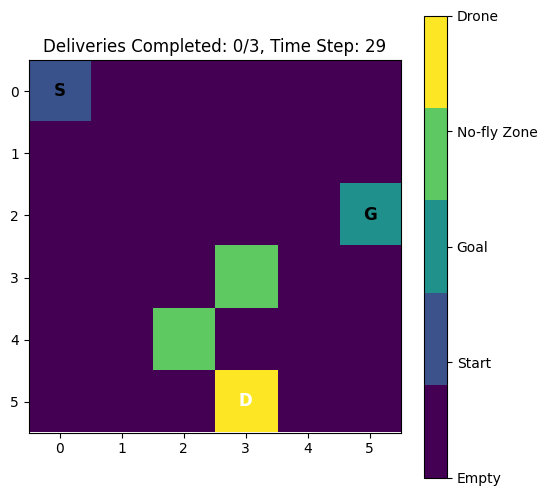

State: (4, 3, 0), Reward: -1


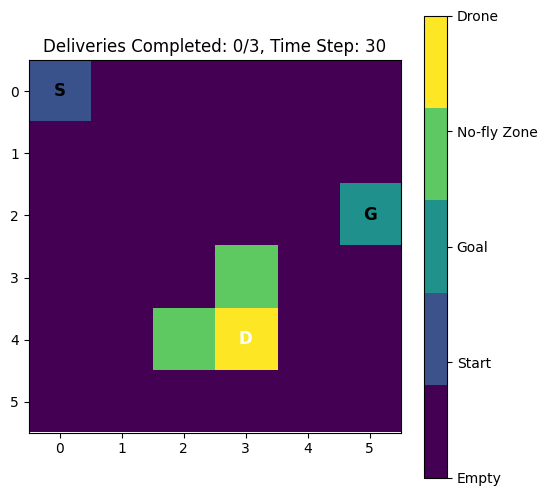

State: (5, 3, 0), Reward: -1


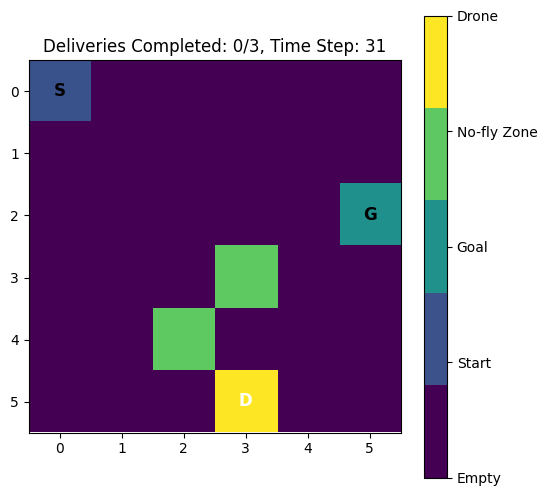

State: (4, 3, 0), Reward: -1


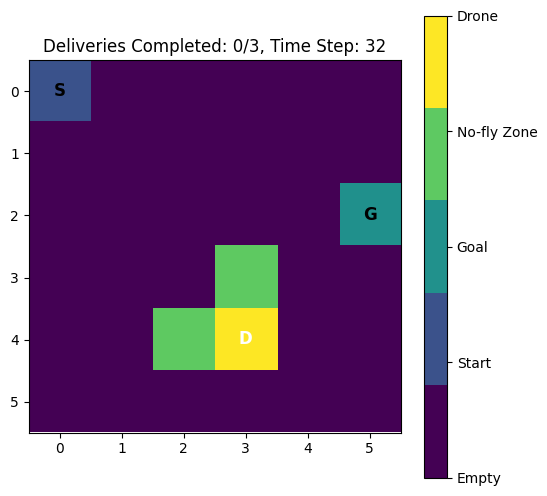

State: (5, 3, 0), Reward: -1


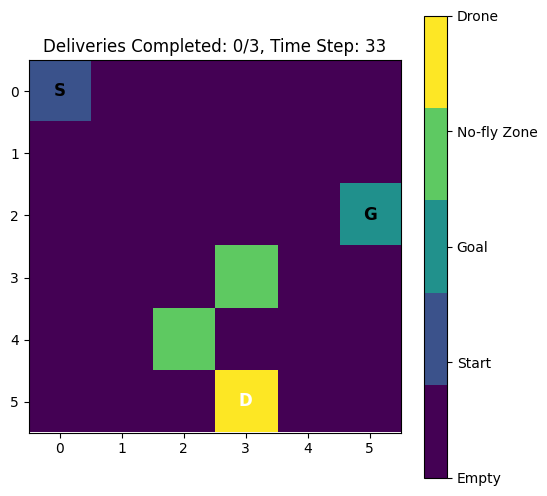

State: (5, 2, 0), Reward: -1


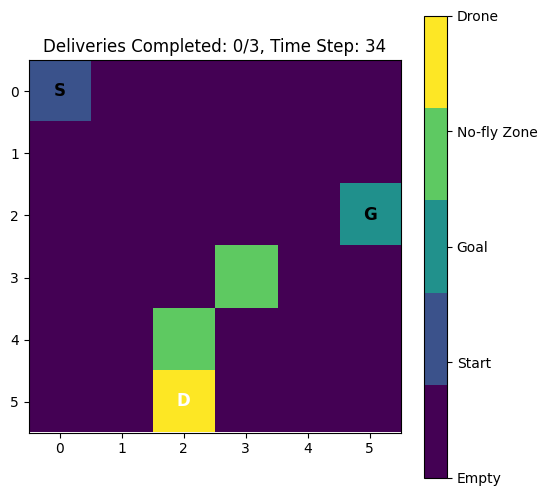

State: (5, 1, 0), Reward: -1


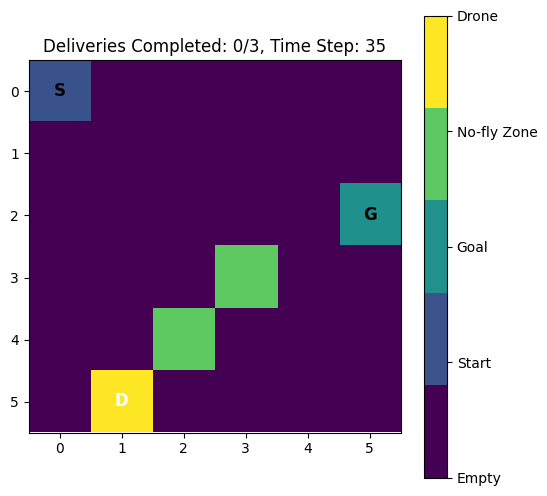

State: (5, 1, 0), Reward: -1


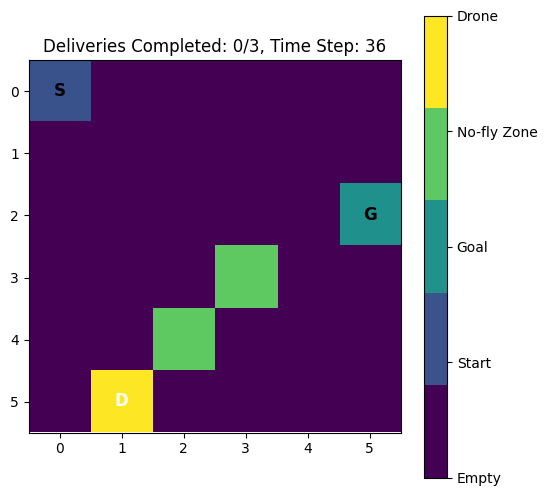

State: (5, 1, 0), Reward: -1


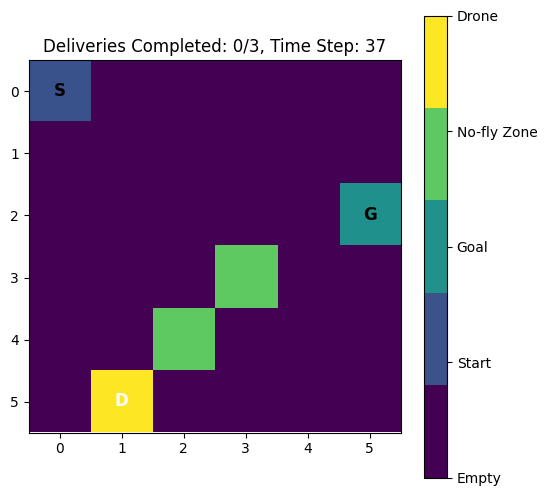

State: (4, 1, 0), Reward: -1


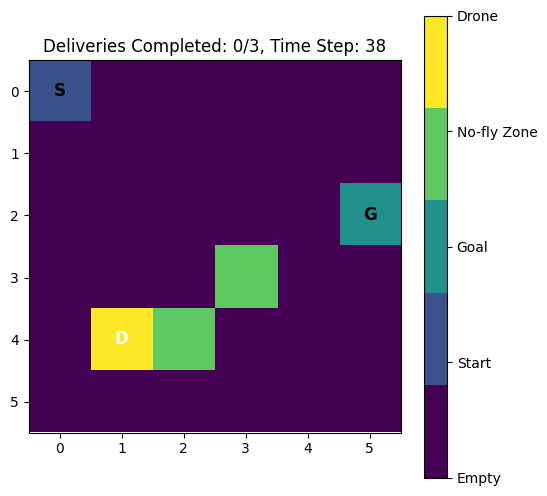

State: (4, 1, 0), Reward: -1


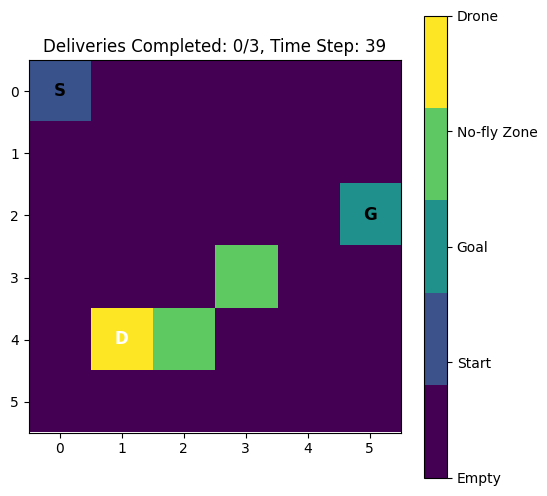

State: (3, 1, 0), Reward: -1


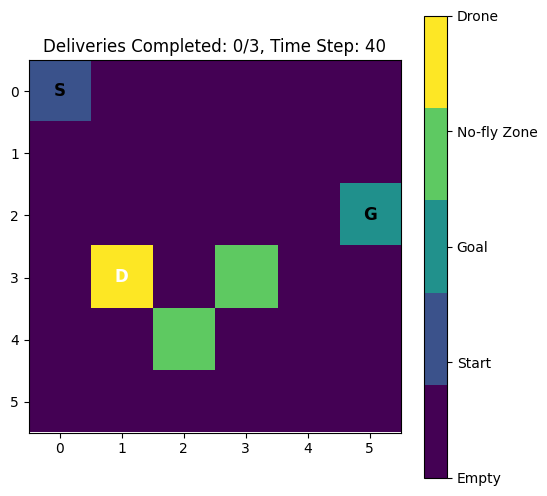

State: (2, 1, 0), Reward: -1


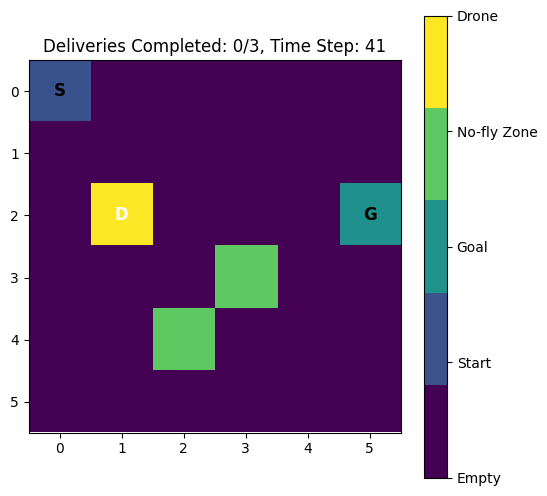

State: (2, 0, 0), Reward: -1


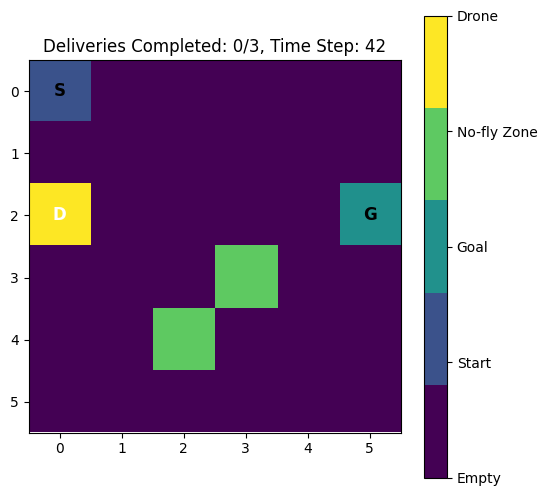

State: (2, 1, 0), Reward: -1


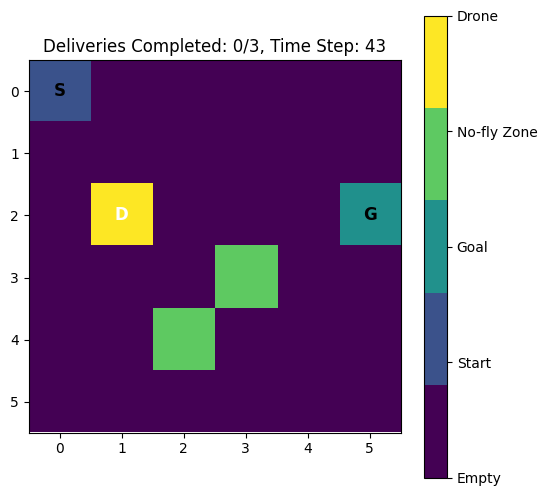

State: (3, 1, 0), Reward: -1


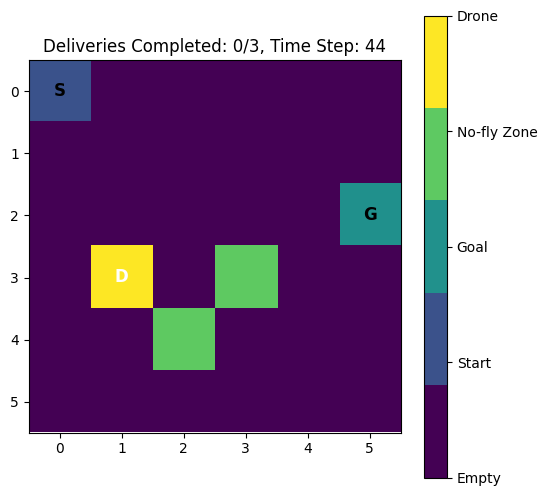

State: (3, 1, 0), Reward: -1


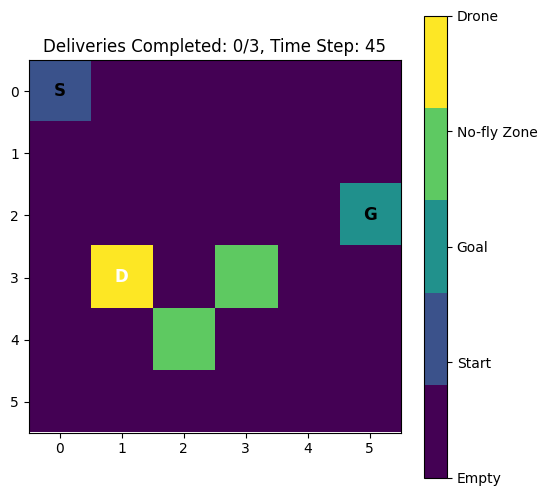

State: (2, 1, 0), Reward: -1


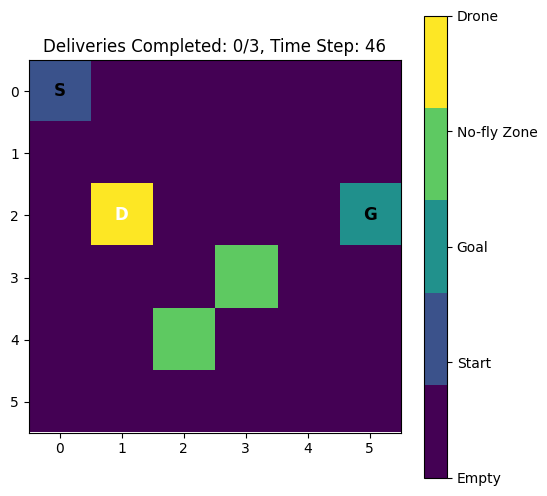

State: (3, 1, 0), Reward: -1


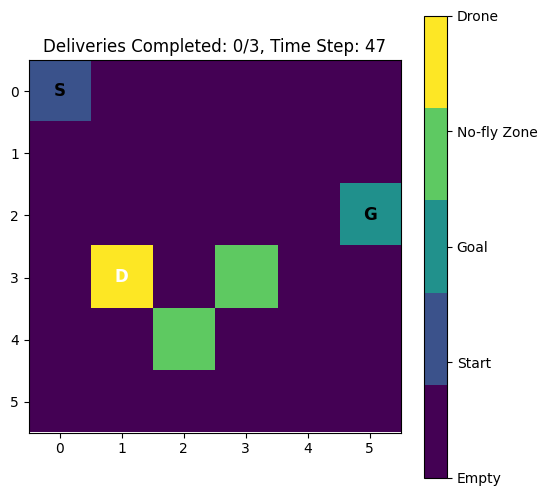

State: (3, 2, 0), Reward: -1


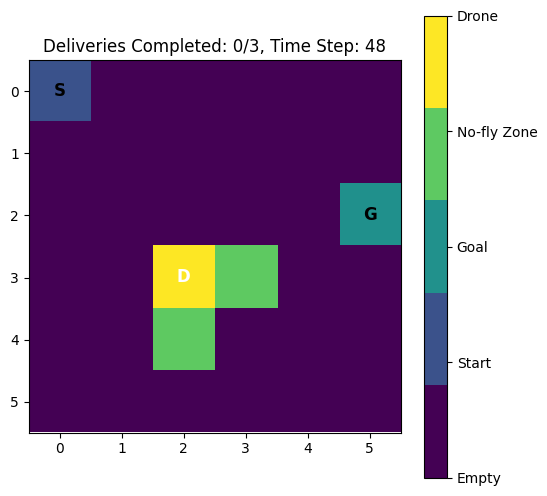

State: (3, 1, 0), Reward: -1


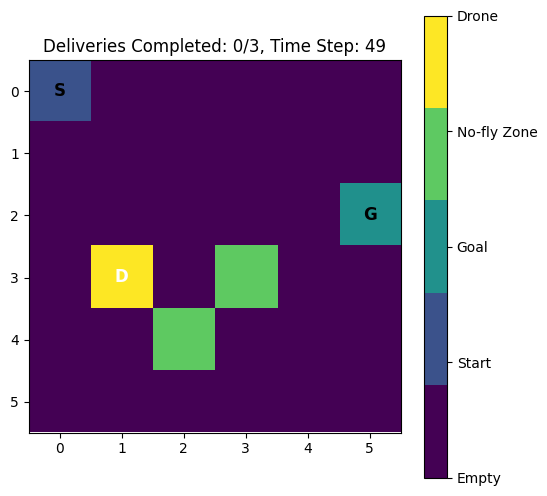

State: (3, 0, 0), Reward: -1


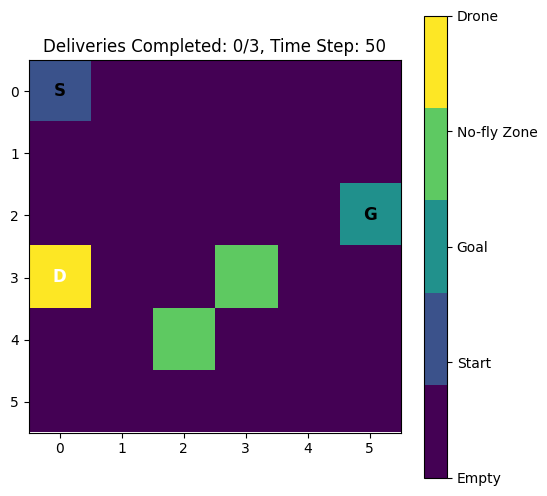

In [7]:
if __name__ == "__main__":
    env = MultiDeliveryDroneEnv(max_deliveries=3, deterministic=True)
    state = env.reset()
    print("Multiple Deliveries Environment:")

    for _ in range(30):
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        print(f"State: {state}, Reward: {reward}")
        env.render()